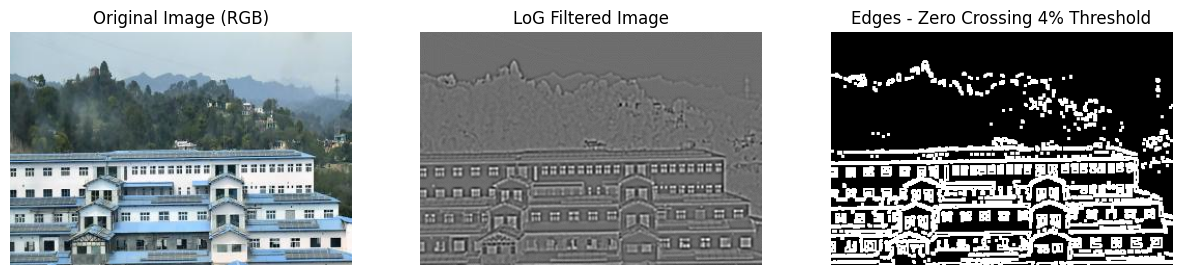

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load and apply Gaussian blur
image = cv2.imread('C:\\Users\\mites\\OneDrive\\Desktop\CV_Assignment 2 (Pics)\\north.jpg', cv2.IMREAD_COLOR)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0) # 5 x 5 as given in book

# Convert the blurred image to grayscale
image_gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)

#Apply LoG filter
LoG = cv2.Laplacian(image_gray, cv2.CV_16S)

#Zero cross
threshold_value = 255 * 0.04 # 255 is the max value
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < threshold_value,  LoG > threshold_value), np.logical_and(maxLoG > threshold_value, LoG < threshold_value))

#Plotting
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

#LoG filtered image
plt.subplot(132)
plt.imshow(LoG, cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')

#edge image from zero-crossing
plt.subplot(133)
plt.imshow(zeroCross, cmap='gray')
plt.title('Edges - Zero Crossing 4% Threshold')
plt.axis('off')

plt.show()

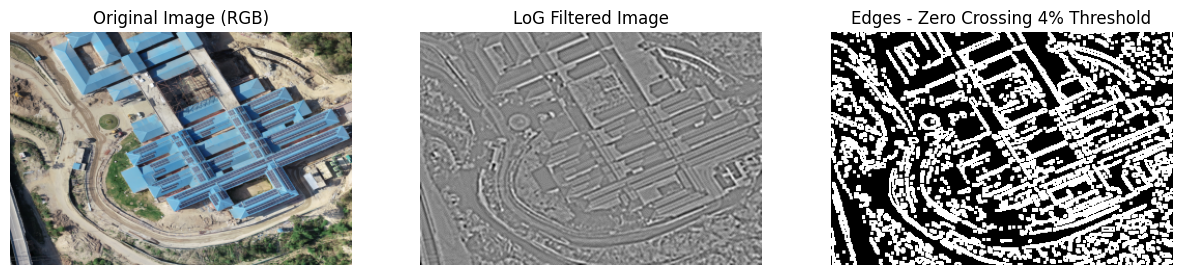

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load and apply Gaussian blur
image = cv2.imread('C:\\Users\\mites\\OneDrive\\Desktop\CV_Assignment 2 (Pics)\\Top view.png', cv2.IMREAD_COLOR)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0) # 5 x 5 as given in book

# Convert the blurred image to grayscale
image_gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)

#Apply LoG filter
LoG = cv2.Laplacian(image_gray, cv2.CV_16S)

#Zero cross
threshold_value = 255 * 0.04 # 255 is the max value
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < threshold_value,  LoG > threshold_value), np.logical_and(maxLoG > threshold_value, LoG < threshold_value))

#Plotting
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

#LoG filtered image
plt.subplot(132)
plt.imshow(LoG, cmap='gray')
plt.title('LoG Filtered Image')
plt.axis('off')

#edge image from zero-crossing
plt.subplot(133)
plt.imshow(zeroCross, cmap='gray')
plt.title('Edges - Zero Crossing 4% Threshold')
plt.axis('off')

plt.show()


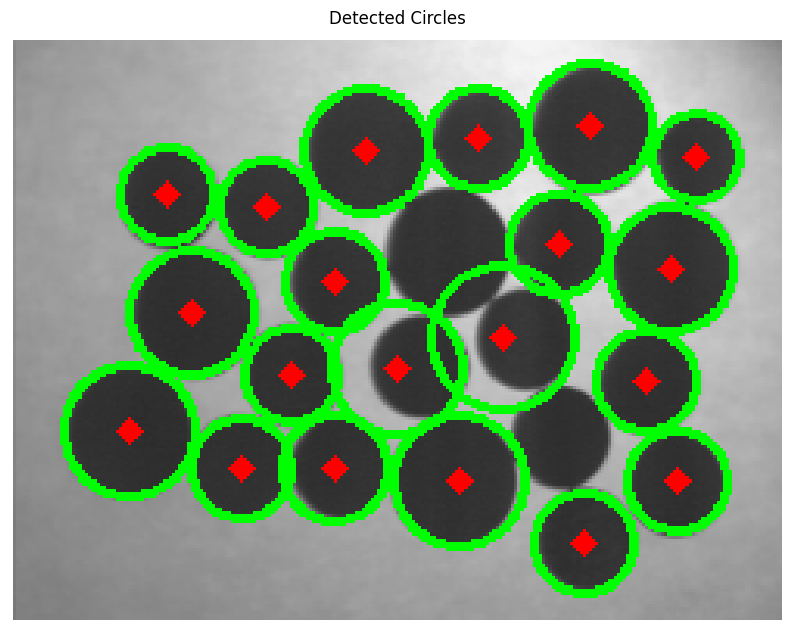

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert the image to grayscale
image = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 2 (Pics)\coins.png')  # Replace 'X.jpg' with your image filename
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Step 3: Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,  # Inverse ratio of the accumulator resolution to the image resolution
    minDist=20,  # Minimum distance between the centers of detected circles
    param1=50,  # Upper threshold for the Canny edge detector
    param2=30,  # Threshold for center detection
    minRadius=0,  # Minimum circle radius
    maxRadius=0   # Maximum circle radius (0 means no limit)
)

# Step 4: Draw the detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))  # Round and convert to integer
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Step 5: Plot the results
plt.figure(figsize=(10, 10))
plt.title("Detected Circles")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.axis('off')  # Turn off axis
plt.show()


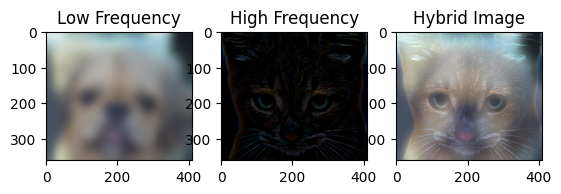

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in color (without converting to grayscale)
img1 = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\dog.jpg')
img2 = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\cat.jpg')

# Check if images are loaded
if img1 is None:
    print("Error: Image 1 could not be loaded. Check the file path.")
if img2 is None:
    print("Error: Image 2 could not be loaded. Check the file path.")

# Proceed only if both images are loaded
if img1 is not None and img2 is not None:
    # Low-pass filter (Gaussian)
    def low_pass_filter(image, kernel_size):
        return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # High-pass filter
    def high_pass_filter(image, kernel_size):
        low_freq = low_pass_filter(image, kernel_size)
        return cv2.subtract(image, low_freq)

    # Generate hybrid image
    def hybrid_image(img_low, img_high):
        # Resize high frequency image to match low frequency image
        if img_low.shape != img_high.shape:
            img_high = cv2.resize(img_high, (img_low.shape[1], img_low.shape[0]))
        return cv2.add(img_low, img_high)

    # Vary kernel sizes and observe
    kernel_sizes = [85]
    for k in kernel_sizes:
        low_freq1 = low_pass_filter(img1, k)
        high_freq2 = high_pass_filter(img2, k)
        hybrid = hybrid_image(low_freq1, high_freq2)

        plt.figure()
        plt.subplot(1, 3, 1)
        plt.title("Low Frequency")
        plt.imshow(cv2.cvtColor(low_freq1, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 3, 2)
        plt.title("High Frequency")
        plt.imshow(cv2.cvtColor(high_freq2, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 3, 3)
        plt.title("Hybrid Image")
        plt.imshow(cv2.cvtColor(hybrid, cv2.COLOR_BGR2RGB))

        plt.show()


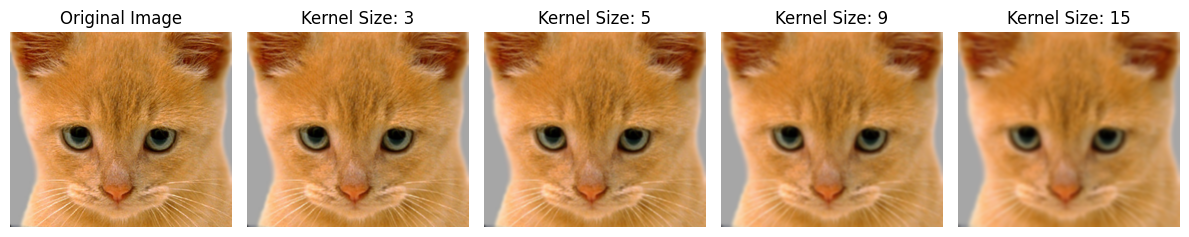

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 2 (Pics)\cat.jpg')

# Check if the image is loaded correctly
if img is None:
    print("Error: Image could not be loaded. Check the file path.")
else:
    # Convert to RGB for displaying in matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Function to apply Gaussian Smoothing with varying kernel sizes
    def apply_gaussian_smoothing(image, kernel_size):
        return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # List of different kernel sizes (must be odd numbers)
    kernel_sizes = [3, 5, 9, 15]

    # Plot the original and smoothed images with varying filter sizes
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Apply Gaussian filters with different kernel sizes and display results
    for i, k in enumerate(kernel_sizes, 2):
        smoothed_img = apply_gaussian_smoothing(img_rgb, k)
        plt.subplot(1, len(kernel_sizes) + 1, i)
        plt.imshow(smoothed_img)
        plt.title(f"Kernel Size: {k}")
        plt.axis('off')

    # Show all the plots
    plt.tight_layout()
    plt.show()


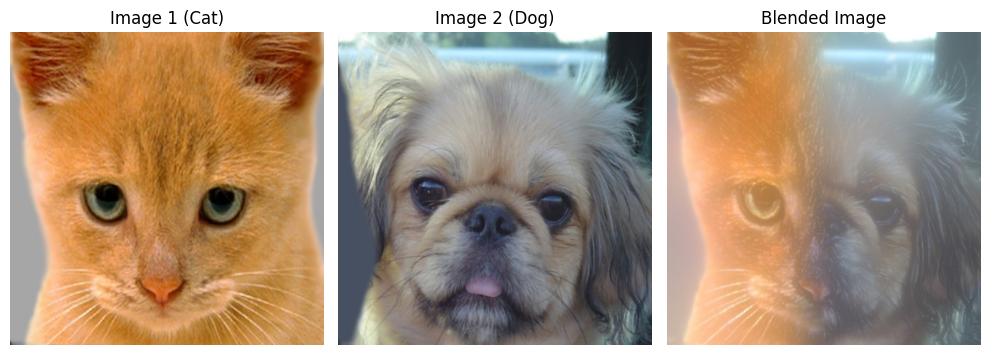

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (cat and dog)
img1 = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 2 (Pics)\cat.jpg')  
img2 = cv2.imread(r'C:\Users\mites\OneDrive\Desktop\CV_Assignment 2 (Pics)\dog.jpg')  

# Check if the images are loaded correctly
if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded. Check the file paths.")
else:
    # Resize both images to the same size for proper blending
    img1 = cv2.resize(img1, (512, 512))
    img2 = cv2.resize(img2, (512, 512))

    # Function to create a Gaussian Pyramid
    def gaussian_pyramid(image, levels):
        gaussian_pyr = [image]
        for i in range(levels):
            image = cv2.pyrDown(image)  # Downsample the image
            gaussian_pyr.append(image)
        return gaussian_pyr

    # Function to create a Laplacian Pyramid from a Gaussian Pyramid
    def laplacian_pyramid(gaussian_pyr):
        laplacian_pyr = []
        for i in range(len(gaussian_pyr) - 1):
            size = (gaussian_pyr[i].shape[1], gaussian_pyr[i].shape[0])
            expanded = cv2.pyrUp(gaussian_pyr[i + 1], dstsize=size)
            laplacian = cv2.subtract(gaussian_pyr[i], expanded)
            laplacian_pyr.append(laplacian)
        laplacian_pyr.append(gaussian_pyr[-1])  # Add the smallest level
        return laplacian_pyr

    # Number of pyramid levels
    levels = 6

    # Generate Gaussian and Laplacian Pyramids for both images
    gp1 = gaussian_pyramid(img1, levels)
    gp2 = gaussian_pyramid(img2, levels)
    
    lp1 = laplacian_pyramid(gp1)
    lp2 = laplacian_pyramid(gp2)

    # Now blend the Laplacian pyramids of both images
    blended_pyr = []
    for l1, l2 in zip(lp1, lp2):
        rows, cols, dpt = l1.shape
        # Blend the left and right halves of the image
        blended = np.hstack((l1[:, :cols // 2], l2[:, cols // 2:]))
        blended_pyr.append(blended)

    # Reconstruct the image from the blended Laplacian pyramid
    blended_image = blended_pyr[-1]
    for i in range(levels - 1, -1, -1):
        size = (blended_pyr[i].shape[1], blended_pyr[i].shape[0])
        blended_image = cv2.pyrUp(blended_image, dstsize=size)
        blended_image = cv2.add(blended_image, blended_pyr[i])

    # Display the results
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title("Image 1 (Cat)")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title("Image 2 (Dog)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title("Blended Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
